In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Forming inputs and multi-outputs
np.random.seed(42)
X = np.random.randn(1000, 2)
y1 = np.random.permutation(np.array(['Yes'] * 500 + ['No'] * 500)).reshape((1000, 1)) 
y2 = np.random.permutation(np.array(['A'] * 200 + ['B'] * 500 + ['C'] * 300)).reshape((1000, 1))

# Stacking y1 and y2
y = np.hstack((y1, y2))

# Building Dataset
df = pd.DataFrame(np.hstack((X, y)), columns=['num_1', 'num_2', 'label_1', 'label_2'])
df = df.astype({'num_1': float, 'num_2': float, 'label_1': str, 'label_2': str})
df.sample(n=10)

,num_1,num_2,label_1,label_2
406,1.446978,0.196555,Yes,B
898,-0.319054,-0.796026,No,A
391,0.380198,0.610586,Yes,C
80,-0.974682,0.787085,Yes,C
173,-1.448084,-1.407464,No,B
755,-1.141689,-0.193659,Yes,A
799,0.020794,-0.728003,No,C
99,0.058209,-1.142970,Yes,C
222,-1.304470,0.669673,No,B
514,0.613518,-1.022793,Yes,B


In [18]:
# Train Test split
X = df.drop(columns=['label_1', 'label_2'])
y = df.copy().loc[:, ['label_1', 'label_2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model building and training
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10
)
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [20]:
# Model Prediction
y_pred = model.predict(X_test)

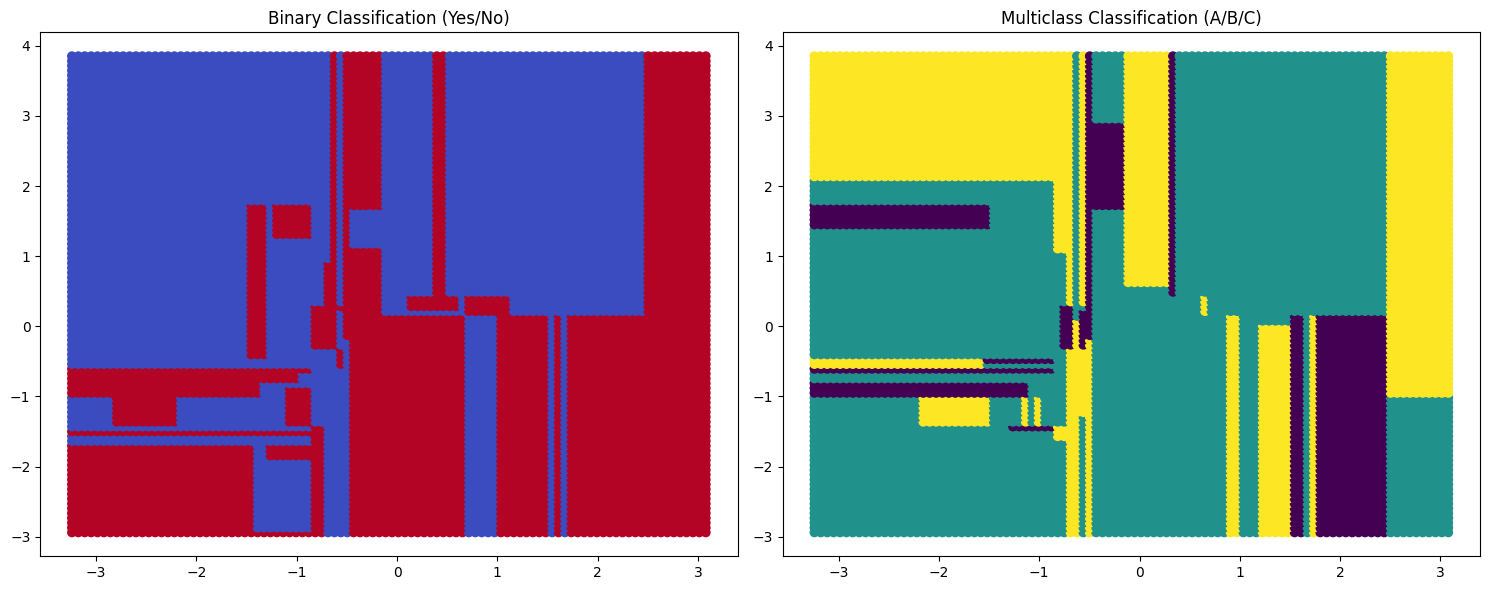

In [ ]:
# Plotting decision boundries
X_1 = np.linspace(start=X['num_1'].min(), stop=X['num_1'].max(), num=100)
y_1 = np.linspace(start=X['num_2'].min(), stop=X['num_2'].max(), num=100)
XX, yy = np.meshgrid(X_1, y_1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Convert predictions to numpy arrays for proper plotting
predictions = model.predict(np.hstack((XX.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1))))
binary_pred = np.where(predictions[:, 0] == 'Yes', 1, 0)
multiclass_pred = np.where(predictions[:, 1] == 'A', 0, np.where(predictions[:, 1] == 'B', 1, 2))

ax[0].scatter(
    x=XX.ravel(),
    y=yy.ravel(),
    c=binary_pred,
    cmap='coolwarm'
)
ax[0].set_title('Binary Classification (Yes/No)')

ax[1].scatter(
    x=XX.ravel(),
    y=yy.ravel(),
    c=multiclass_pred,
    cmap='viridis'
)
ax[1].set_title('Multiclass Classification (A/B/C)')

plt.tight_layout()
plt.show()

> Decision Trees typically require `consistent output types` - they `cannot simultaneously handle` both `categorical` and `numerical target variables` in a `single model`
